In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from graphviz import Digraph

In [7]:
class Value:
    def __init__(self, data, label='', _prev=(), _op=''):
        assert isinstance(data, (int, float)), "only support integer or float values"
        self.data = float(data) 
        self.label = label
        self._prev = set(_prev)
        self._op = _op

        self.grad = 0.0    
        self._backward = lambda: None

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        output = Value(self.data + other.data, f'{self.label}+{other.label}', (self, other), '+')

        def _backward():
            self.grad += 1.0 * output.grad
            other.grad += 1.0 * output.grad

            self._backward()
            other._backward()
        output._backward = _backward

        return output
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        output = Value(self.data * other.data, f'{self.label}*{other.label}', (self, other), '*')


        def _backward():
            self.grad += other.data * output.grad
            other.grad += other.data * output.grad

            self._backward()
            other._backward()
        output._backward = _backward

        return output
    

In [12]:
def get_graph(root: Value):
    nodes, edges = set(), set()
    def dfs(node):
        if node in nodes: return
        nodes.add(node)
        for child in node._prev:
            edges.add((child, node))
            dfs(child)
    dfs(root)
    return nodes, edges

def draw_graph(root):
    painter = Digraph(format='svg', graph_attr={'rankdir':'LR'})

    nodes, edges = get_graph(root) 
    for node in nodes:
        uid = str(id(node))

        painter.node(name=uid, label=f'{{{node.label} | {node.data} | {node.grad}}}', shape='record')
        if node._op:
            painter.node(name=uid+node._op, label=node._op)
            painter.edge(uid+node._op, uid)

    for child, parent in edges:
        painter.edge(str(id(child)), str(id(parent)) + parent._op)
    
    return painter

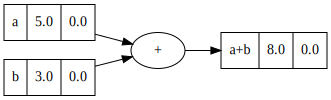

In [14]:
a = Value(5); a.label = 'a'
b = Value(3); b.label = 'b'
c = a + b
draw_graph(c)